In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Arefin\Downloads\Notebooks\House Price.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Arefin\\Downloads\\Notebooks\\House Price.csv'

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
df.shape

(4600, 18)

In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
df.drop(columns='date',inplace=True)

In [ ]:
df.drop(columns='street', inplace=True)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA


In [ ]:
df['city'].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [ ]:
df['city'].value_counts().sort_values(ascending=False)

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Kirkland                187
Issaquah                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
Tukwila                  29
SeaTac                   29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Fall City                11
Medina                   11
Black Diamond             9
Ravensdale                7
Pacific        

In [ ]:
df['country'].unique()

array(['USA'], dtype=object)

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
statezip          object
country           object
dtype: object

In [ ]:
label_encoder= LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])
df['statezip'] = label_encoder.fit_transform(df['statezip'])
df['country'] = label_encoder.fit_transform(df['country'])

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,58,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,26,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,7,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31,0


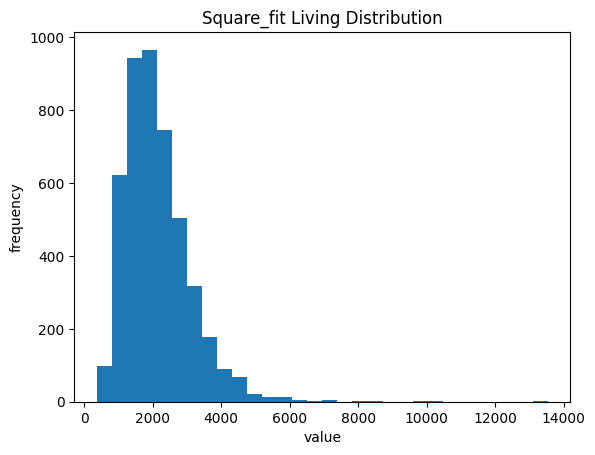

In [ ]:
plt.hist(df['sqft_living'], bins=30)
plt.title("Square_fit Living Distribution")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

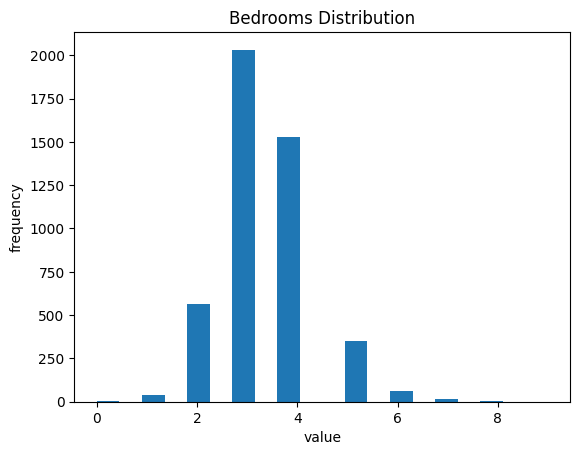

In [ ]:
plt.hist(df['bedrooms'], bins=20)
plt.title("Bedrooms Distribution")
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

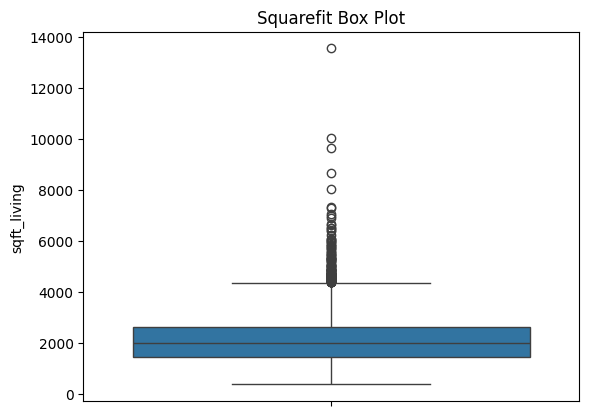

In [ ]:
sns.boxplot(df['sqft_living'])
plt.title('Squarefit Box Plot')
plt.show()

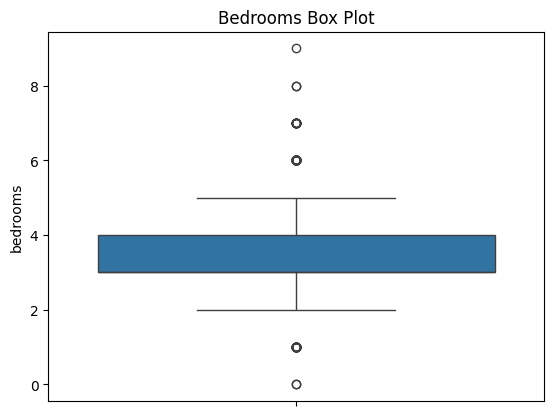

In [ ]:
sns.boxplot(df['bedrooms'])
plt.title('Bedrooms Box Plot')
plt.show()

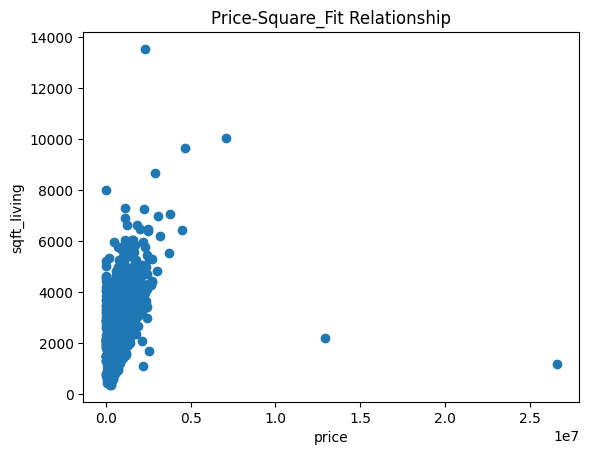

In [ ]:
plt.scatter(df['price'], df['sqft_living'])
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title("Price-Square_Fit Relationship")
plt.show()

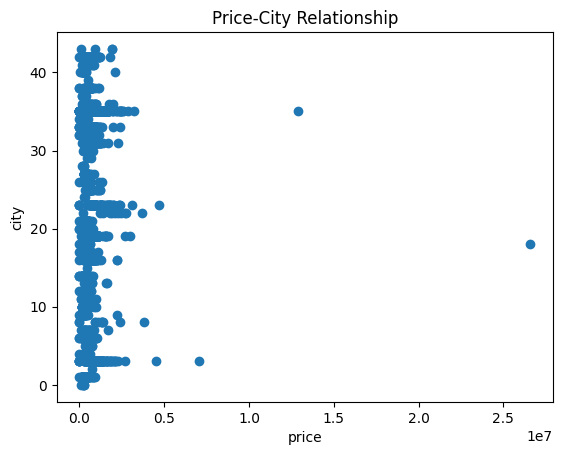

In [ ]:
plt.scatter(df['price'], df['city'])
plt.xlabel('price')
plt.ylabel('city')
plt.title("Price-City Relationship")
plt.show()

<Axes: >

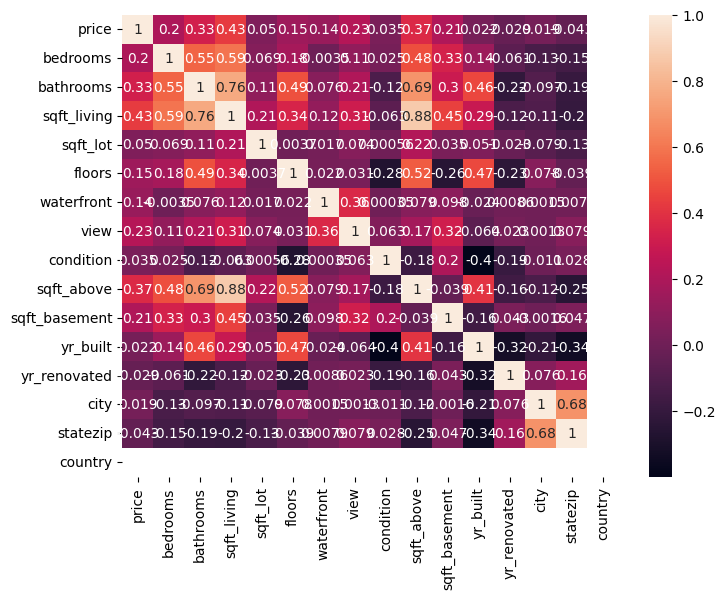

In [ ]:
x = df.select_dtypes('number')
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), annot=True)

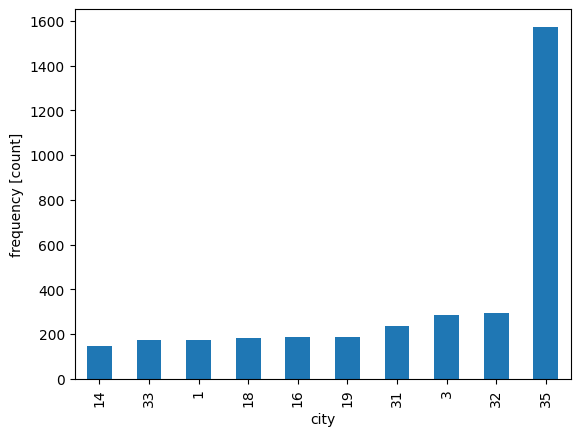

In [ ]:
df['city'].value_counts().sort_values().tail(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("frequency [count]");

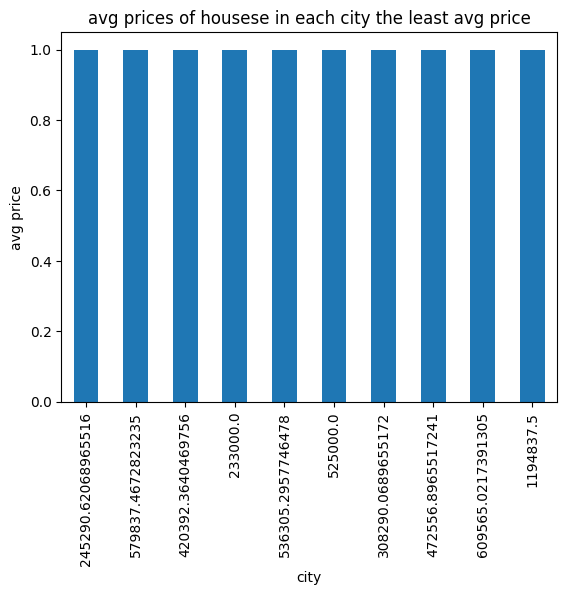

In [ ]:
df.groupby('city')['price'].mean().value_counts().sort_values().tail(10).plot(kind="bar")
plt.xlabel("city")
plt.ylabel("avg price")
plt.title("avg prices of housese in each city the least avg price");

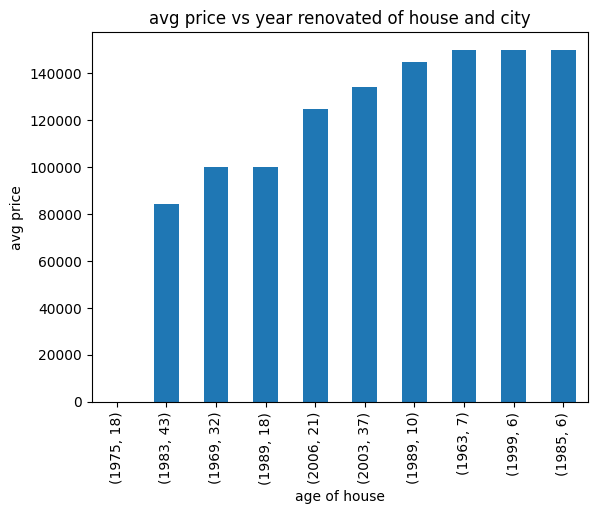

In [ ]:
df.groupby(['yr_renovated','city'])['price'].mean().sort_values().head(10).plot(kind="bar")
plt.xlabel("age of house")
plt.ylabel("avg price")
plt.title("avg price vs year renovated of house and city");

In [ ]:
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [ ]:
x.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,62,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,58,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,26,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,7,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,31,0


In [ ]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-5.84444819e+04,  6.55079481e+04,  1.64090642e+02, -8.36081401e-01,
        2.22442834e+04,  4.01364943e+05,  4.56821610e+04,  3.50085509e+04,
        1.02077891e+02,  6.20127505e+01, -2.42908279e+03,  7.62771462e+00,
        3.29397354e+03, -1.52824897e+03,  0.00000000e+00])

In [ ]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-58444.481949
bathrooms,65507.948088
sqft_living,164.090642
sqft_lot,-0.836081
floors,22244.283353
waterfront,401364.943018
view,45682.161031
condition,35008.550884
sqft_above,102.077891
sqft_basement,62.012750


In [ ]:
model.score(X_test,y_test)

0.4632434307255927

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions

array([ 607521.42687399,  280183.43593173,  405190.88600044,
        558390.13788154,  431486.84700682,  315379.40478443,
        323412.27944756,  358993.99946934,  378770.06044079,
        411217.73457812,  710453.66620115,  799802.99393419,
       1071035.35681598,  702277.97081988,  622184.88921975,
        968203.66030522,  506939.88637548,  560121.62281027,
       1157080.30206049,  347201.79509743,  553544.42620512,
        769786.42015697,  472769.5823509 ,  666913.85002119,
        376290.07659766,  659132.23613088,  970595.46560082,
        341116.65932334,  396301.7535724 ,  325775.02534584,
        496357.84700326,  543223.35801248, 1147455.01283107,
        320892.23386996,  262797.87117912,  666162.10310424,
        542824.13196345,  855463.18656498, 1117700.45815992,
        446771.15364323,  720810.60348833,  556879.21684375,
        345950.15621401,  462074.21070691,  607190.21091744,
        464726.37025002,  443076.65217939,  396160.35639807,
        367436.27765058,

In [ ]:
y_test

3193    725000.0
4043    374000.0
56      491500.0
216     485000.0
3831    480000.0
          ...   
1158    300000.0
2635    475000.0
166     425000.0
4212    215000.0
2163    620000.0
Name: price, Length: 920, dtype: float64

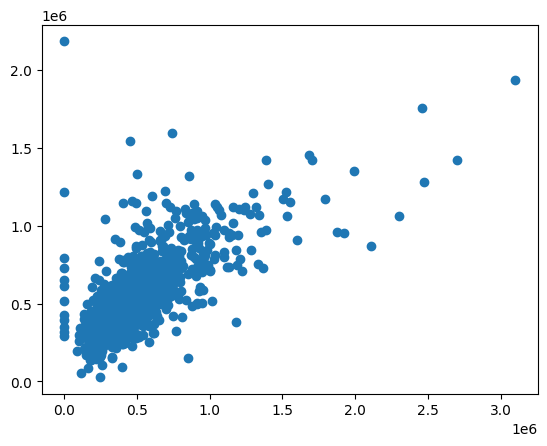

In [ ]:
plt.scatter(y_test, predictions)